C:\Users\USER\AppData\Local\Temp\ipykernel_4632\57510703.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Total_Protein', data=df, palette='Paired')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\57510703.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='Total_Protein', data=df, palette='Paired', jitter=True, size=8)


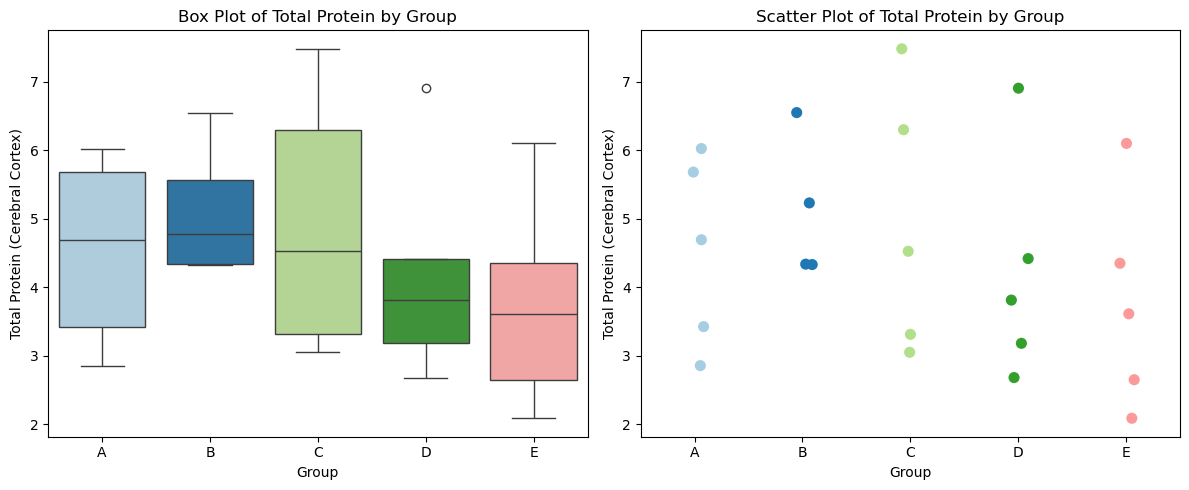

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E'],
    'Total_Protein': [
        2.858838226, 4.695190506, 5.682073704, 3.427232979, 6.025608994,  # Group A
        4.339163023, 6.550281074, 5.232354778, 4.332916927,            # Group B
        7.480949407, 3.314803248, 6.300437227, 3.052467208, 4.526545909,  # Group C
        6.906308557, 3.814490943, 3.183635228, 4.420362274, 2.683947533,  # Group D
        4.351655215, 2.652717052, 2.090568395, 6.100562149, 3.614615865   # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Total_Protein', data=df, palette='Paired')
plt.title('Box Plot of Total Protein by Group')
plt.ylabel('Total Protein (Cerebral Cortex)')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='Total_Protein', data=df, palette='Paired', jitter=True, size=8)
plt.title('Scatter Plot of Total Protein by Group')
plt.ylabel('Total Protein (Cerebral Cortex)')
plt.xlabel('Group')

# Adjust layout and display
plt.tight_layout()
plt.show()

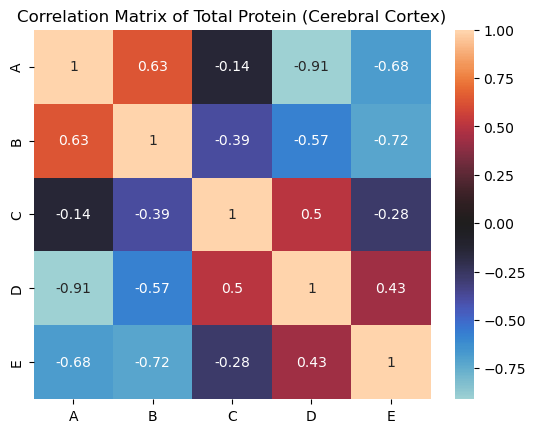

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [2.858838226, 4.695190506, 5.682073704, 3.427232979, 6.025608994],
    'B': [4.339163023, 6.550281074, 5.232354778, 4.332916927],
    'C': [7.480949407, 3.314803248, 6.300437227, 3.052467208, 4.526545909],
    'D': [6.906308557, 3.814490943, 3.183635228, 4.420362274, 2.683947533],
    'E': [4.351655215, 2.652717052, 2.090568395, 6.100562149, 3.614615865]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='icefire', center=0)
plt.title('Correlation Matrix of Total Protein (Cerebral Cortex)')
plt.show()


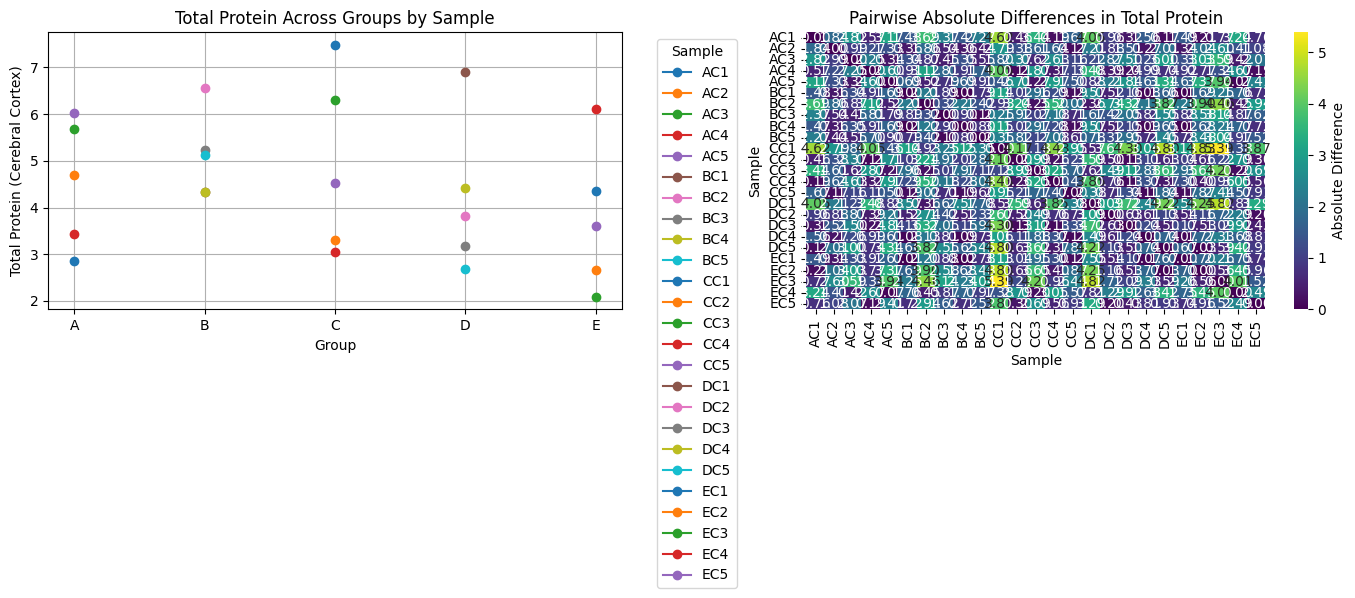

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B','B', 'C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E'],
    'Sample': ['AC1', 'AC2', 'AC3', 'AC4', 'AC5', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5',
               'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'DC1', 'DC2', 'DC3', 'DC4', 'DC5',
               'EC1', 'EC2', 'EC3', 'EC4', 'EC5'],
    'Total_Protein': [
        2.858838226, 4.695190506, 5.682073704, 3.427232979, 6.025608994,  # Group A
        4.339163023, 6.550281074, 5.232354778, 4.332916927, 5.130321342,   # Group B
        7.480949407, 3.314803248, 6.300437227, 3.052467208, 4.526545909,  # Group C
        6.906308557, 3.814490943, 3.183635228, 4.420362274, 2.683947533,  # Group D
        4.351655215, 2.652717052, 2.090568395, 6.100562149, 3.614615865   # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Pivot data for line plot
pivot_data = df.pivot(index='Sample', columns='Group', values='Total_Protein')

# Set up figure
plt.figure(figsize=(14, 5))

# Line Plot
plt.subplot(1, 2, 1)
for i in range(len(pivot_data)):
    plt.plot(pivot_data.columns, pivot_data.iloc[i], marker='o', label=pivot_data.index[i])
plt.title('Total Protein Across Groups by Sample')
plt.xlabel('Group')
plt.ylabel('Total Protein (Cerebral Cortex)')
plt.legend(title='Sample', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Heatmap of Pairwise Differences
# Create a matrix of absolute differences between all samples
all_samples = df[['Sample', 'Total_Protein']].set_index('Sample')
diff_matrix = np.abs(all_samples['Total_Protein'].values[:, None] - all_samples['Total_Protein'].values)
diff_matrix = pd.DataFrame(diff_matrix, index=all_samples.index, columns=all_samples.index)

plt.subplot(1, 2, 2)
sns.heatmap(diff_matrix, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Absolute Difference'})
plt.title('Pairwise Absolute Differences in Total Protein')
plt.xlabel('Sample')
plt.ylabel('Sample')

# Adjust layout and display
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4632\405471651.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Catalase', data=df, palette='tab10')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\405471651.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='Catalase', data=df, palette='tab10', jitter=True, size=8)


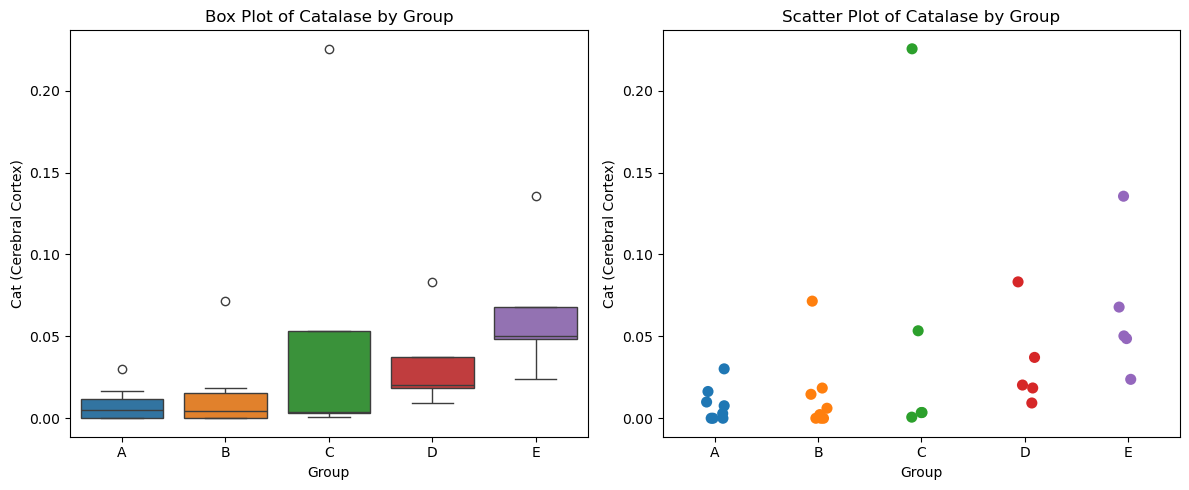

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','B', 'B', 'B', 'B','B','B','B','B','C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E'],
    'Catalase': [
        0.009910786, 0.016328766, 0.007626324, 0.002917806, 0.030149096, 0, 0, 0, # Group A
        0.018436735, 0.006106608, 0.002229716, 0.014616789, 0.071482035, 0, 0, 0, # Group B
        0.000668364, 0.003519565, 0.003438915, 0.225500648, 0.053388759, # Group C
        0.020271321, 0.037139075, 0.083238179, 0.018475107 , 0.009314638,  # Group D
        0.023745754, 0.067854956, 0.13552933,  0.048629398, 0.050258914 # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Catalase', data=df, palette='tab10')
plt.title('Box Plot of Catalase by Group')
plt.ylabel('Cat (Cerebral Cortex)')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='Catalase', data=df, palette='tab10', jitter=True, size=8)
plt.title('Scatter Plot of Catalase by Group')
plt.ylabel('Cat (Cerebral Cortex)')
plt.xlabel('Group')

# Adjust layout and display
plt.tight_layout()
plt.show()

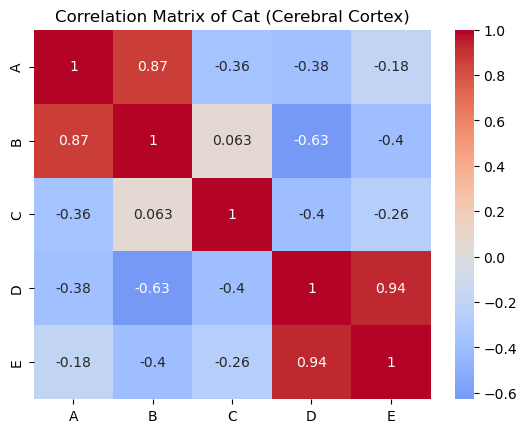

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [0.009910786, 0.016328766, 0.007626324, 0.002917806, 0.030149096, 0, 0, 0],
    'B': [0.018436735, 0.006106608, 0.002229716, 0.014616789, 0.071482035, 0, 0, 0],
    'C': [0.000668364, 0.003519565, 0.003438915, 0.225500648, 0.053388759],
    'D': [0.020271321, 0.037139075, 0.083238179, 0.018475107 , 0.009314638],
    'E': [0.023745754, 0.067854956, 0.13552933,  0.048629398, 0.050258914]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cat (Cerebral Cortex)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4632\1783472757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='GSH', data=df, palette='Accent')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\1783472757.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='GSH', data=df, palette='Accent', jitter=True, size=8)


Text(0.5, 0, 'Group')

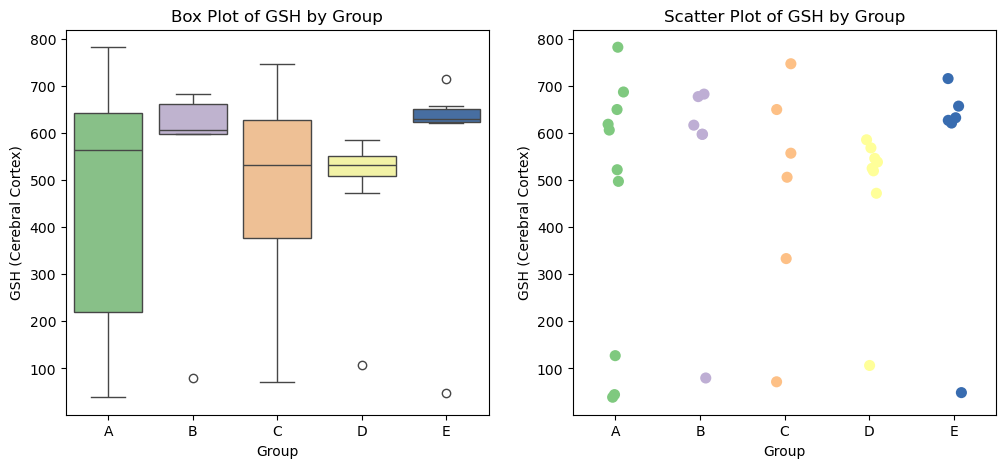

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','A','A','B', 'B', 'B', 'B','B','B','C', 'C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D','D','D','D', 'E', 'E', 'E', 'E', 'E', 'E'],
    'GSH': [
        618.6808511, 522.0851064, 38.89361702, 497.4042553, 44.42553191, 782.2978723, 649.9574468, 606.3404255, 127.1914894, # Group A
        687.1914894, 616.7659574, 597.4042553, 597.4042553, 682.7234043, 79.74468085, # Group B
        677.4042553, 506.1276596, 71.65957447, 333.3617021, 649.9574468, 557.1914894, # Group C
        747.1914894, 585.7021277, 525.0638298, 106.3404255, 538.4680851, 568.4680851, 546.1276596, 472.0851064,  # Group D
        519.7446809, 715.7021277, 632.5106383, 48.68085106, 621.2340426, 626.9787234, 657.1914894 # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='GSH', data=df, palette='Accent')
plt.title('Box Plot of GSH by Group')
plt.ylabel('GSH (Cerebral Cortex)')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='GSH', data=df, palette='Accent', jitter=True, size=8)
plt.title('Scatter Plot of GSH by Group')
plt.ylabel('GSH (Cerebral Cortex)')
plt.xlabel('Group')

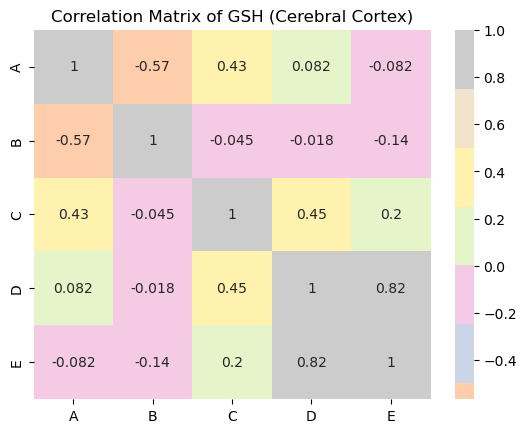

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [618.6808511, 522.0851064, 38.89361702, 497.4042553, 44.42553191, 782.2978723, 649.9574468, 606.3404255, 127.1914894],
    'B': [687.1914894, 616.7659574, 597.4042553, 597.4042553, 682.7234043, 79.74468085],
    'C': [677.4042553, 506.1276596, 71.65957447, 333.3617021, 649.9574468, 557.1914894],
    'D': [747.1914894, 585.7021277, 525.0638298, 106.3404255, 538.4680851, 568.4680851, 546.1276596, 472.0851064],
    'E': [519.7446809, 715.7021277, 632.5106383, 48.68085106, 621.2340426, 626.9787234, 657.1914894]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Pastel2', center=0)
plt.title('Correlation Matrix of GSH (Cerebral Cortex)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4632\366951257.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Serum Nitrite', data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\366951257.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='Serum Nitrite', data=df, palette='Set2', jitter=True, size=8)


Text(0.5, 0, 'Group')

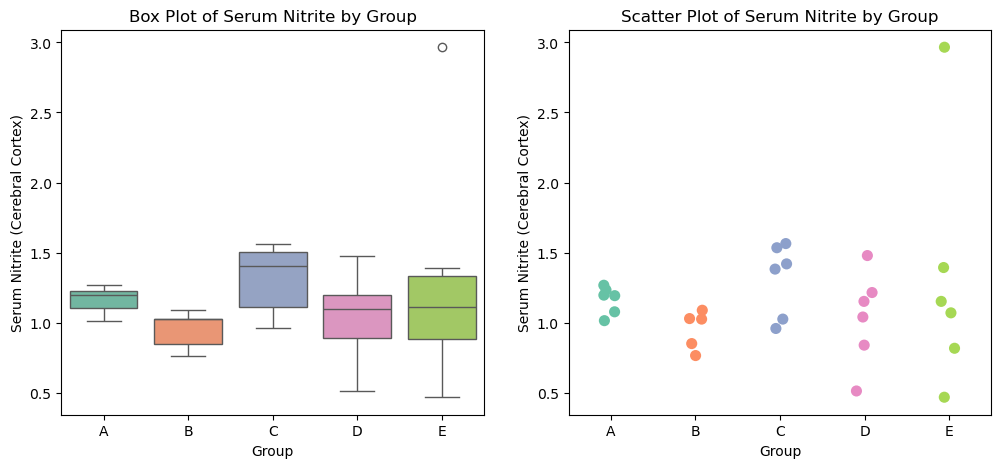

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'A','B', 'B', 'B', 'B','B','C', 'C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D','D', 'E', 'E', 'E', 'E', 'E', 'E'],
    'Serum Nitrite': [
        1.196282528, 1.07732342, 1.192565056, 1.266914498, 1.233457249, 1.014126394, # Group A
        0.850557621, 1.028996283, 1.088475836, 0.765055762, 1.02527881, # Group B
        1.02527881, 0.958364312, 1.382156134, 1.534572491, 1.564312268, 1.419330855, # Group C
        1.478810409, 0.512267658, 0.839405205, 1.151672862, 1.040148699, 1.214869888,  # Group D
        2.965799257, 1.069888476, 0.817100372, 1.151672862, 0.467657993, 1.39330855  # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Serum Nitrite', data=df, palette='Set2')
plt.title('Box Plot of Serum Nitrite by Group')
plt.ylabel('Serum Nitrite (Cerebral Cortex)')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='Serum Nitrite', data=df, palette='Set2', jitter=True, size=8)
plt.title('Scatter Plot of Serum Nitrite by Group')
plt.ylabel('Serum Nitrite (Cerebral Cortex)')
plt.xlabel('Group')

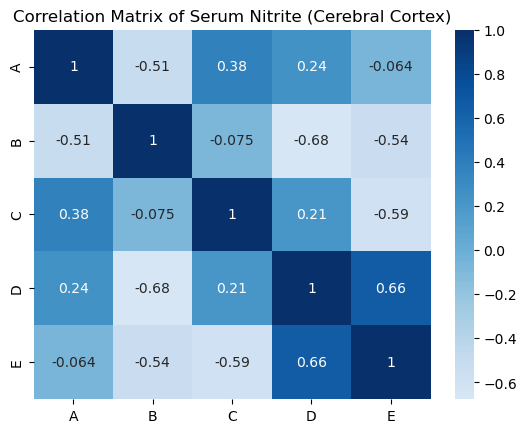

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [1.196282528, 1.07732342, 1.192565056, 1.266914498, 1.233457249, 1.014126394],
    'B': [0.850557621, 1.028996283, 1.088475836, 0.765055762, 1.02527881],
    'C': [1.02527881, 0.958364312, 1.382156134, 1.534572491, 1.564312268, 1.419330855],
    'D': [1.478810409, 0.512267658, 0.839405205, 1.151672862, 1.040148699, 1.214869888],
    'E': [2.965799257, 1.069888476, 0.817100372, 1.151672862, 0.467657993, 1.39330855]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix of Serum Nitrite (Cerebral Cortex)')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4632\3132594232.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='MDA', data=df, palette='Dark2')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\3132594232.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='MDA', data=df, palette='Set1', jitter=True, size=8)


Text(0.5, 0, 'Group')

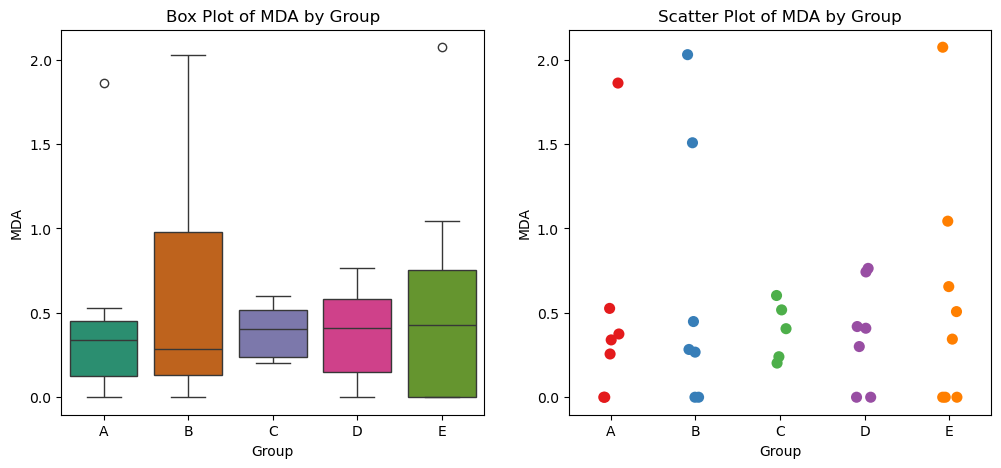

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'A','A','B', 'B', 'B', 'B','B','B','B','C', 'C', 'C', 'C', 'C',
              'D', 'D', 'D', 'D', 'D','D', 'D','E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
    'MDA': [
        1.861523616, 0.374633225, 0.339574472, 0.526327263, 0.256171575, 0, 0, # Group A
        1.507734938, 0.267164108, 0.283002452, 2.029780848, 0.448412305, 0, 0, # Group B
        0.23992567, 0.406103695, 0.202265165, 0.602707077, 0.517460275, # Group C
        0.300171489, 0.418780886, 0.408740939, 0.763367065, 0.742305007, 0, 0,  # Group D
        0.507322432, 2.073829189, 1.043146561, 0.344230572, 0.655458521, 0, 0, 0 # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='MDA', data=df, palette='Dark2')
plt.title('Box Plot of MDA by Group')
plt.ylabel('MDA')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='MDA', data=df, palette='Set1', jitter=True, size=8)
plt.title('Scatter Plot of MDA by Group')
plt.ylabel('MDA')
plt.xlabel('Group')

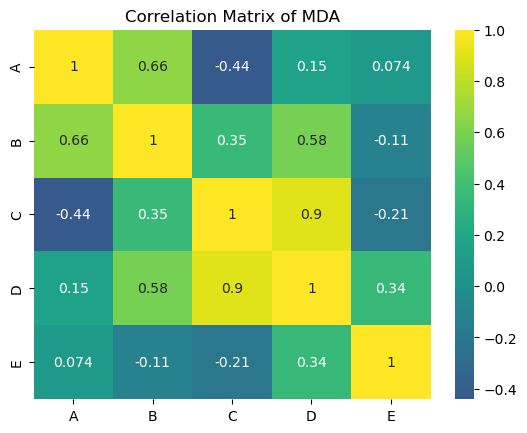

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [1.861523616, 0.374633225, 0.339574472, 0.526327263, 0.256171575, 0, 0],
    'B': [1.507734938, 0.267164108, 0.283002452, 2.029780848, 0.448412305, 0, 0],
    'C': [0.23992567, 0.406103695, 0.202265165, 0.602707077, 0.517460275],
    'D': [0.300171489, 0.418780886, 0.408740939, 0.763367065, 0.742305007, 0, 0],
    'E': [0.507322432, 2.073829189, 1.043146561, 0.344230572, 0.655458521, 0, 0, 0]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix of MDA')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4632\680929280.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='MPO', data=df, palette='Dark2')
C:\Users\USER\AppData\Local\Temp\ipykernel_4632\680929280.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='MPO', data=df, palette='Dark2', jitter=True, size=8)


Text(0.5, 0, 'Group')

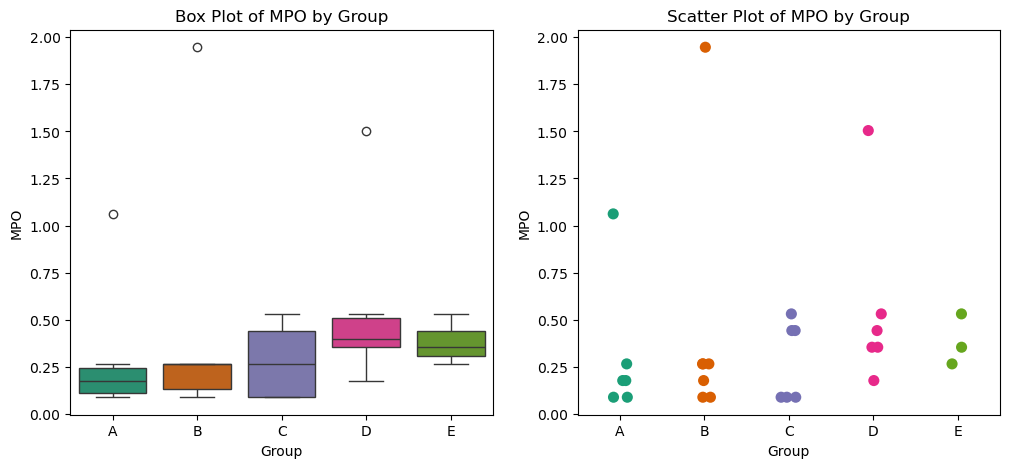

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Group': ['A', 'A', 'A', 'A', 'A', 'A','B', 'B', 'B', 'B','B','B','B','C', 'C', 'C', 'C', 'C','C',
              'D', 'D', 'D', 'D', 'D','D','E', 'E', 'E'],
    'MPO': [
        0.17699115, 1.061946903, 0.265486726, 0.088495575, 0.088495575, 0.17699115, # Group A
        0.265486726, 0.265486726, 0.17699115, 0.088495575, 0.265486726, 0.088495575, 1.946902655, # Group B
        0.088495575, 0.530973451, 0.442477876, 0.088495575, 0.088495575, 0.442477876, # Group C
        0.353982301, 1.504424779, 0.442477876, 0.17699115, 0.353982301, 0.530973451,  # Group D
        0.265486726, 0.530973451, 0.353982301 # Group E
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='MPO', data=df, palette='Dark2')
plt.title('Box Plot of MPO by Group')
plt.ylabel('MPO')
plt.xlabel('Group')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.stripplot(x='Group', y='MPO', data=df, palette='Dark2', jitter=True, size=8)
plt.title('Scatter Plot of MPO by Group')
plt.ylabel('MPO')
plt.xlabel('Group')

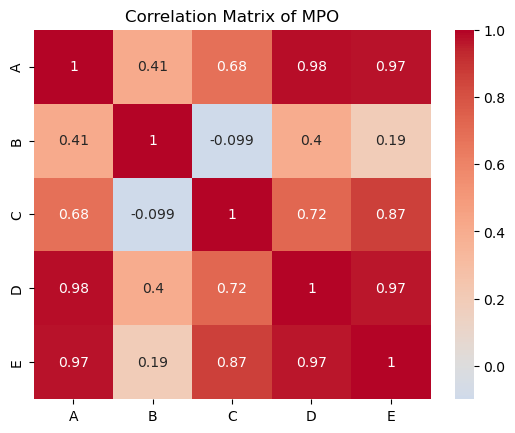

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data
data = {
    'A': [0.17699115, 1.061946903, 0.265486726, 0.088495575, 0.088495575, 0.17699115],
    'B': [0.265486726, 0.265486726, 0.17699115, 0.088495575, 0.265486726, 0.088495575, 1.946902655],
    'C': [0.088495575, 0.530973451, 0.442477876, 0.088495575, 0.088495575, 0.442477876],
    'D': [0.353982301, 1.504424779, 0.442477876, 0.17699115, 0.353982301, 0.530973451],
    'E': [0.265486726, 0.530973451, 0.353982301]
}

# Create equal-length DataFrame (pad shorter lists with NaN)
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Compute correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of MPO')
plt.show()